
# KNN - K Nearest Neighbours Modeli





Bu projede şeker hastalığı veri setini kullanarak Machine Learning modellerinden KNN Modelini uygulayacağız.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
data = pd.read_csv("diabetes.csv")
data.head()

# Veri setimizdeki ilk 5 veriyi listeliyoruz:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


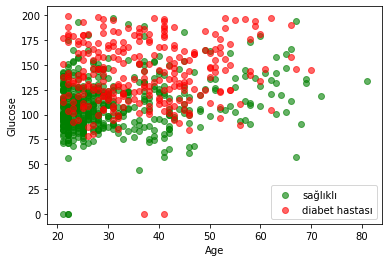

In [2]:


seker_hastalari = data[data.Outcome == 1] # Outcome 1, veri setimizdeki hastaları tanımlıyor.
saglikli_insanlar = data[data.Outcome == 0] # Outcome 0 veri setimizdeki sağlıklı insanları tanımlıyor.


# Şimdilik sadece gloucose'a bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="sağlıklı", alpha = 0.6)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="diabet hastası", alpha = 0.6)
plt.xlabel("Age") # Yaş
plt.ylabel("Glucose") # Glikoz oranı
plt.legend()
plt.show()


In [3]:


# x ve y eksenlerini belirleyelim
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1) # Tablomuzdan outcome yi kaldırdık.  
# Outcome sütununu(dependent variable, sonuç) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


# NORMALİZATİON yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Bunu yapma nedenimiz örneğin yaş dataları 80 e kadar giderken hamilelik 3-4-5 şeklinde gidiyor. Fakat bizim hepsine aynı ağırlığı vermemiz gerekiyor.
# Bu nedenle Normalizasyon yapıyoruz. Böylece KNN algoritması yanılmayacak!!!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head()) # önce


 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head()) # sonra
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  

In [4]:
# TEST - TRAIN İŞLEMİ

# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak --> Yapay zeka eğitme işlemi
# test datamız ise algoritmamızın ne kadar doğru tahmin yapabildiğini ölçmek için kullanılacak --> Yapay zeka test işlemi
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=1) # 768 hastamın %25 tanesini test için kullanacağım

# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k # K Değerimiz (En yakın kaç komşuya bakılacak?)
knn.fit(x_train,y_train) # eğitme (fit)
prediction = knn.predict(x_test) #test (prediction)
print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))


K=3 için Test verilerimizin doğrulama testi sonucu  0.7708333333333334


In [5]:




# k kaç olmalı ?
# en iyi k değerini belirleyelim..
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    
    #En doğru sonuç k=7

1    Doğruluk oranı: % 69.79166666666666
2    Doğruluk oranı: % 70.83333333333334
3    Doğruluk oranı: % 77.08333333333334
4    Doğruluk oranı: % 74.47916666666666
5    Doğruluk oranı: % 80.20833333333334
6    Doğruluk oranı: % 78.125
7    Doğruluk oranı: % 79.6875
8    Doğruluk oranı: % 78.125
9    Doğruluk oranı: % 78.64583333333334
10    Doğruluk oranı: % 77.60416666666666
